In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def load_data():
    data = pd.read_csv('all_data.csv')
    return data

In [59]:
data = load_data()

In [11]:
data["Hardware"].value_counts()

Hardware
mucluster    661
expanse      150
Name: count, dtype: int64

In [12]:
data["Collected By"].value_counts()

Collected By
Seth and Jeremy     637
Geoffrey & Carl      68
Zach & Jacob         37
Yousuf and Colin     27
Austin & Owen        20
JP & David M         17
Davin + Rob           5
Name: count, dtype: int64

<Axes: xlabel='World Size', ylabel='Time (sec)'>

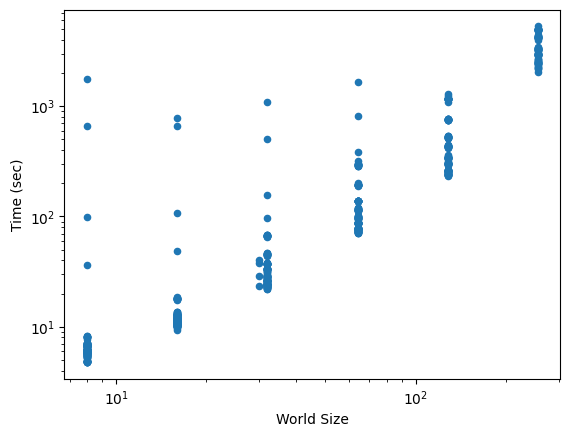

In [60]:
data[data["Hardware"] == "mucluster"].plot(kind="scatter", y="Time (sec)", x="World Size", logy=True, logx=True)

/var/folders/pp/9763yrfs46zc5t2hj08t494r0000gp/T/ipykernel_19807/3364712056.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.drop(new_data[new_data["World Size"] == 8][new_data["Time (sec)"] > 10].index)
/var/folders/pp/9763yrfs46zc5t2hj08t494r0000gp/T/ipykernel_19807/3364712056.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.drop(new_data[new_data["World Size"] == 16][new_data["Time (sec)"] > 40].index)
/var/folders/pp/9763yrfs46zc5t2hj08t494r0000gp/T/ipykernel_19807/3364712056.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.drop(new_data[new_data["World Size"] == 32][new_data["Time (sec)"] > 100].index)
/var/folders/pp/9763yrfs46zc5t2hj08t494r0000gp/T/ipykernel_19807/3364712056.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data = new_data.drop(new_data[new_data["World Size"] == 

<Axes: xlabel='World Size', ylabel='Time (sec)'>

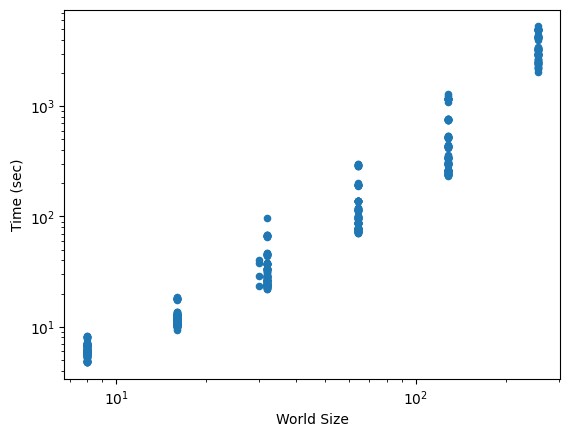

In [61]:
new_data = data
new_data = new_data.drop(new_data[new_data["World Size"] == 8][new_data["Time (sec)"] > 10].index)
new_data = new_data.drop(new_data[new_data["World Size"] == 16][new_data["Time (sec)"] > 40].index)
new_data = new_data.drop(new_data[new_data["World Size"] == 32][new_data["Time (sec)"] > 100].index)
new_data = new_data.drop(new_data[new_data["World Size"] == 64][new_data["Time (sec)"] > 300].index)

new_data[new_data["Hardware"] == "mucluster"].plot(kind="scatter", y="Time (sec)", x="World Size", logy=True, logx=True)

<Axes: xlabel='World Size'>

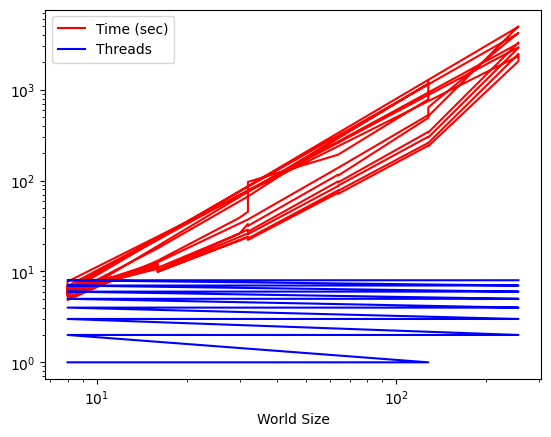

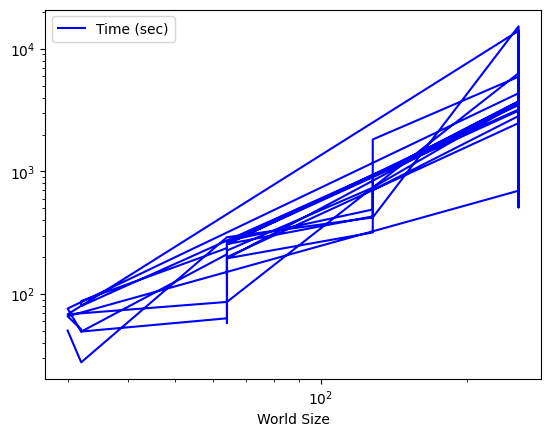

In [78]:
# remove collected by column
grouped_data = new_data.drop(columns=["Collected By"])

# when I come back, just plot only one world size at a time and have the bottom be threads of nodes or whatever

# average together all times with the same threads, world size, and hardware
grouped_data = grouped_data.groupby(["Threads", "World Size", "Hardware", "Serial/Shared/Distributed"]).mean().reset_index()

grouped_data[grouped_data["Hardware"] == "mucluster"].plot(kind="line", y=["Time (sec)", "Threads"], x="World Size", logy=True, logx=True, color=['r', 'b'])
grouped_data[grouped_data["Hardware"] == "expanse"].plot(kind="line", y="Time (sec)", x="World Size", logy=True, logx=True, color=['b'])

World Size
8      Axes(0.125,0.11;0.775x0.77)
16     Axes(0.125,0.11;0.775x0.77)
30     Axes(0.125,0.11;0.775x0.77)
32     Axes(0.125,0.11;0.775x0.77)
64     Axes(0.125,0.11;0.775x0.77)
128    Axes(0.125,0.11;0.775x0.77)
256    Axes(0.125,0.11;0.775x0.77)
Name: Time (sec), dtype: object

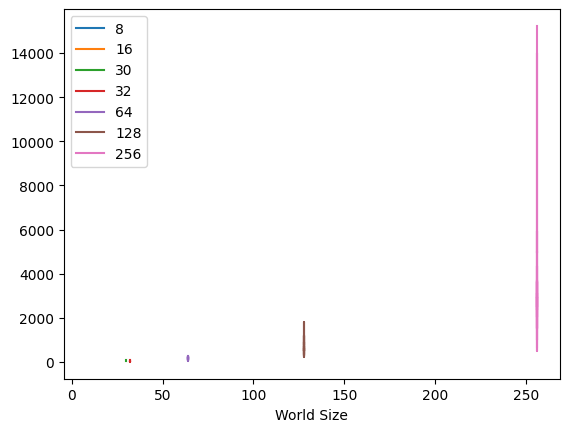

In [95]:
# grouped_data[grouped_data["Hardware"] == "mucluster"][grouped_data["World Size"] == 8][grouped_data["Tasks/Nodes"] == 1].plot(kind="line", y="Time (sec)", x="Threads", color=['r', 'b'])
# grouped_data.set_index("World Size", inplace=True)
grouped_data.groupby("World Size")["Time (sec)"].plot(kind="line", legend=True, y="Time (sec)", x="Threads")